<a href="https://colab.research.google.com/github/Asdk22-eu/RI2025A/blob/main/Ejercicio_4_Modelo_Probabil%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 4: Modelo Probabilístico
##Objetivo de la práctica
* Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
* Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
* Comparar la recuperación con BM25 frente a TF-IDF.
* Analizar visualmente las diferencias entre los modelos.
* Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

#Parte 0: Carga del Corpus




In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

#Parte 1: Cálculo de TF, DF, IDF y TF-IDF
##Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [41]:
#1. Usar el corpus cargado newsgroupsdocs
corpus= newsgroupsdocs
#2. Construir la matriz TF
# Inicializamos el vectorizador.
count_vect = CountVectorizer()
# Ajusta el vectorizador y transforma el corpus con fit transform.
X_tf = count_vect.fit_transform(corpus)
terms = count_vect.get_feature_names_out()
# Para calcular DF
#df_counts = (X_counts > 0).sum(axis=0)
df_values = (X_tf > 0).sum(axis=0).A1

#3. Calcular TF-IDF con sklearn
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(corpus)

#4. Visualizar los valores en un DataFrame
# Crear DataFrame con información completa
n_docs = len(corpus)
idf_values = np.log(n_docs / df_values)

In [33]:
# DataFrame con las métricas que desarrollamos y queremos evaluar
metrics_df = pd.DataFrame({
    'Term': terms,
    'DF': df_values,
    'IDF': idf_values
}).sort_values('DF', ascending=False)

print("Data en DataFrame")
print(f"Total de documentos: {n_docs}")
print(f"Vocabulario: {len(terms)} términos")
print(f"Matriz TF-IDF: {X_tfidf.shape}")

#Print de ejemplo con 10 términos para diferenciar los términos
print("\n TOP 10 TÉRMINOS POR FRECUENCIA DE DOCUMENTOS")
print(metrics_df.head(10))

print("\n TÉRMINOS CON MAYOR PESO IDF o menos frecuentes ")
print(metrics_df.sort_values('IDF', ascending=False).head(10))

Data en DataFrame
Total de documentos: 18846
Vocabulario: 134410 términos
Matriz TF-IDF: (18846, 134410)

 TOP 10 TÉRMINOS POR FRECUENCIA DE DOCUMENTOS
        Term     DF       IDF
116790   the  15749  0.179524
117905    to  14108  0.289559
25260    and  12991  0.372044
89588     of  12809  0.386153
65467     in  11842  0.464648
67604     is  11685  0.477995
67837     it  11029  0.535773
116771  that  10974  0.540772
54442    for  10406  0.593918
60784   have   8722  0.770452

 TÉRMINOS CON MAYOR PESO IDF o menos frecuentes 
                Term  DF       IDF
134377    zyxel1496b   1  9.844056
134379         zz20d   1  9.844056
134380           zz3   1  9.844056
134381         zz5co   1  9.844056
134382  zz93sigmc120   1  9.844056
134385       zz_g9q3   1  9.844056
134386          zzc6   1  9.844056
134387         zzcrm   1  9.844056
134388           zzd   1  9.844056
134369         zysec   1  9.844056


#Parte 2: Ranking de documentos usando TF-IDF
##Actividad
1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
#1. Definir consulta y construir vector de consulta, la consulta la tomé de la documentación de newsgroups
query = "The Cleveland Indians is a major league baseball team based in Cleveland, Ohio, USA."
query_vec = tfidf_vect.transform([query])

#2.Calcular similitud coseno entre consulta y todos los documentos con TF-IDF
similarities = cosine_similarity(X_tfidf, query_vec).flatten()

#3. Generar ranking con aquellos con similaridad >0 por eficiencia y relevancia
relevant_indices = np.where(similarities > 0)[0]
relevant_scores = similarities[relevant_indices]
ranking_order = np.argsort(relevant_scores)[::-1]

#4. Crear tabla de resultados con información útil
ranking_df = pd.DataFrame({
    'Rank': range(1, len(ranking_order) + 1),
    'Doc_ID': relevant_indices[ranking_order],
    'Similitud': relevant_scores[ranking_order],
    'Contenido': [newsgroupsdocs[relevant_indices[i]][:120] + "..."
                  for i in ranking_order]
})
# Información de la consulta
query_terms = query.split()
terms_in_vocab = sum(term in tfidf_vect.get_feature_names_out() for term in query_terms)

print("INFORMACION DE LA QUERY ")
print(f"Query: '{query}'")
print(f"Términos en vocabulario: {terms_in_vocab}/{len(query_terms)}")
print(f"Documentos relevantes: {len(ranking_df)}/{len(newsgroupsdocs)}")

print("\nTOP 5 DOCUMENTOS MÁS RELEVANTES ")
print(ranking_df.head(5).to_string(index=False, max_colwidth=50))

INFORMACION DE LA QUERY 
Query: 'The Cleveland Indians is a major league baseball team based in Cleveland, Ohio, USA.'
Términos en vocabulario: 7/14
Documentos relevantes: 16922/18846

TOP 5 DOCUMENTOS MÁS RELEVANTES 
 Rank  Doc_ID  Similitud                                          Contenido
    1   14601   0.338758 They \nthree \nmore \ndivision.\n\nJason, I am ...
    2   11262   0.292419 \nWasn't there an 85,000 New York at Cleveland ...
    3   18430   0.259176 \n\nThe tribe will be in town from April 16 to ...
    4   12470   0.231564 \n\nWhat about U. Johnny Hodapp, the greatest 2...
    5    8788   0.229178 Article 10886 of alt.radio.scanner:\nPath: usen...


#Parte 3: Ranking con BM25
##Actividad
1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [42]:
!pip install rank_bm25

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from rank_bm25 import BM25Okapi
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [46]:
#1. Sistema de recuperación con BM25.
#Para ello, hay que tokenizar.
print("Tokenizar documentos")
tokenized_docs = [word_tokenize(doc.lower()) for doc in newsgroupsdocs]
# Inicializar BM25 con la lista de documentos tokenizados.
bm25 = BM25Okapi(tokenized_docs)

Tokenizar documentos


In [48]:
#2. Usamos la misma consulta del paso anterior.
query = "The Cleveland Indians is a major league baseball team based in Cleveland, Ohio, USA."

# Tokenizamos la consulta
tokenized_query = word_tokenize(query.lower())


In [55]:
#3. Calcular scores BM25 y generar ranking
bm25_scores = bm25.get_scores(tokenized_query)

# Filtrar solo documentos relevantes (score > 0)
relevant_indices = np.where(bm25_scores > 0)[0]
relevant_scores = bm25_scores[relevant_indices]
ranking_order = np.argsort(relevant_scores)[::-1]

# Crear DataFrame de resultados
bm25_ranking_df = pd.DataFrame({
    'Rank': range(1, len(ranking_order) + 1),
    'Doc_ID': relevant_indices[ranking_order],
    'BM25_Score': relevant_scores[ranking_order],
    'Contenido': [newsgroupsdocs[relevant_indices[i]][:120] + "..."
                  for i in ranking_order]
})

print(" RANKING BM25 ")
print(f"Consulta: '{query}'")
print(f"Documentos relevantes: {len(bm25_ranking_df)}/{len(newsgroupsdocs)}")
print("\nTop 5 documentos más relevantes:")
print(bm25_ranking_df.head(5).to_string(index=False, max_colwidth=50))


 RANKING BM25 
Consulta: 'The Cleveland Indians is a major league baseball team based in Cleveland, Ohio, USA.'
Documentos relevantes: 18059/18846

Top 5 documentos más relevantes:
 Rank  Doc_ID  BM25_Score                                          Contenido
    1   17532   55.306055 Dale Hunter ties the game, scoring his third go...
    2    6767   55.009827 Is there any doubt that this is true?  After a ...
    3    4634   54.612031 Having run completely out of time, I've got to ...
    4   12470   54.569864 \n\nWhat about U. Johnny Hodapp, the greatest 2...
    5    1551   53.293443 Oh, yea, and Chris Bosio pitched a NO-HITTER.  ...


In [53]:
#4: Comparación manual con TF-IDF (usando ranking_df)
print("\n COMPARACION BM25 vs TF-IDF ")
print("Top 5 documentos - BM25:")
for i in range(min(5, len(bm25_ranking_df))):
    doc_id = bm25_ranking_df.iloc[i]['Doc_ID']
    score = bm25_ranking_df.iloc[i]['BM25_Score']
    print(f"  {i+1}. Doc {doc_id} - Score: {score:.4f}")

print("\nTop 5 documentos - TF-IDF:")
for i in range(min(5, len(ranking_df))):
    doc_id = ranking_df.iloc[i]['Doc_ID']
    score = ranking_df.iloc[i]['Similitud']
    print(f"  {i+1}. Doc {doc_id} - Score: {score:.4f}")



 COMPARACION BM25 vs TF-IDF 
Top 5 documentos - BM25:
  1. Doc 17532 - Score: 55.3061
  2. Doc 6767 - Score: 55.0098
  3. Doc 4634 - Score: 54.6120
  4. Doc 12470 - Score: 54.5699
  5. Doc 1551 - Score: 53.2934

Top 5 documentos - TF-IDF:
  1. Doc 14601 - Score: 0.3388
  2. Doc 11262 - Score: 0.2924
  3. Doc 18430 - Score: 0.2592
  4. Doc 12470 - Score: 0.2316
  5. Doc 8788 - Score: 0.2292


#PARTE 4
##Actividad
1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [57]:
import matplotlib.pyplot as plt

#Número de documentos a visualizar
top_n = 10

# Obtenemos los índices top de TF-IDF y BM25
tfidf_top_docs = ranking_df.head(top_n)['Doc_ID'].values
bm25_top_docs = bm25_ranking_df.head(top_n)['Doc_ID'].values

union_docs = np.union1d(tfidf_top_docs, bm25_top_docs)

# Obtener scores para estos documentos
tfidf_scores_comparison = []
bm25_scores_comparison = []
for doc_id in union_docs:
    # Score TF-IDF (similitud coseno)
    tfidf_score = similarities[doc_id]
    tfidf_scores_comparison.append(tfidf_score)

    # Score BM25
    bm25_score = bm25_scores[doc_id]
    bm25_scores_comparison.append(bm25_score)

# Crear DataFrame para análisis
comparison_df = pd.DataFrame({
    'Doc_ID': union_docs,
    'TF-IDF_Score': tfidf_scores_comparison,
    'BM25_Score': bm25_scores_comparison,
    'TF-IDF_Rank': [np.where(ranking_df['Doc_ID'] == doc)[0][0] + 1
                    if doc in ranking_df['Doc_ID'].values else len(ranking_df) + 1
                    for doc in union_docs],
    'BM25_Rank': [np.where(bm25_ranking_df['Doc_ID'] == doc)[0][0] + 1
                  if doc in bm25_ranking_df['Doc_ID'].values else len(bm25_ranking_df) + 1
                  for doc in union_docs]
})

# Calcular diferencia de rankings
comparison_df['Rank_Diff'] = comparison_df['TF-IDF_Rank'] - comparison_df['BM25_Rank']
comparison_df = comparison_df.sort_values('TF-IDF_Score', ascending=False)

print(" COMPARACION DETALLADA TF-IDF vs BM25 ")
print(comparison_df.head(10))



 COMPARACION DETALLADA TF-IDF vs BM25 
    Doc_ID  TF-IDF_Score  BM25_Score  TF-IDF_Rank  BM25_Rank  Rank_Diff
13   14601      0.338758   50.716819            1          9         -8
10   11262      0.292419   27.847208            2       7305      -7303
15   18430      0.259176   47.694914            3         17        -14
11   12470      0.231564   54.569864            4          4          0
3     2773      0.229178   52.167770            6          6          0
9     8788      0.229178   52.167770            5          7         -2
1     2366      0.186814   38.740439            7        198       -191
4     2905      0.183818   36.211607            8        439       -431
12   14337      0.180124   34.896576            9        739       -730
8     6874      0.176815    7.758036           10      17399     -17389


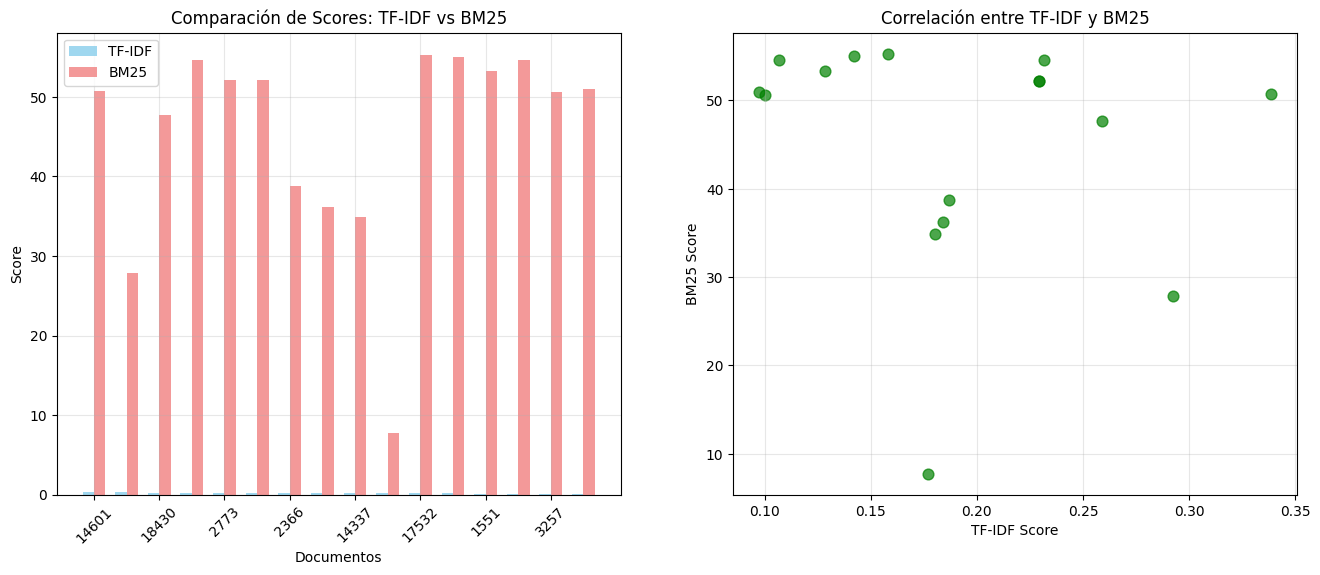

In [64]:
#  Visualización con gráfico de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico : Comparación de scores
x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax1.bar(x - width/2, comparison_df['TF-IDF_Score'], width,
                label='TF-IDF', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x + width/2, comparison_df['BM25_Score'], width,
                label='BM25', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Documentos')
ax1.set_ylabel('Score')
ax1.set_title('Comparación de Scores: TF-IDF vs BM25')
ax1.set_xticks(x[::2])  # Mostrar cada 2 etiquetas para evitar amontonamiento
ax1.set_xticklabels(comparison_df['Doc_ID'].iloc[::2], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)
# Gráfico 2: Scatter plot para correlación
ax2.scatter(comparison_df['TF-IDF_Score'], comparison_df['BM25_Score'],
           alpha=0.7, s=60, color='green')
ax2.set_xlabel('TF-IDF Score')
ax2.set_ylabel('BM25 Score')
ax2.set_title('Correlación entre TF-IDF y BM25')
ax2.grid(True, alpha=0.3)

Según se observa, y según la teoría BM25 tiende a favorecer documentos más largos; que a su vez tienen más elementos o detalles y contienen muchas menciones de los términos de búsqueda, pero con una penalización controlada por saturación. Por otro lado, TF-IDF favorece documentos más concisos donde los términos de búsqueda tienen un peso relativo mayor debido a la menor longitud total del documento.

Respecto a la pregunta 4 de esta Parte, las diferencias entre los scores de ambos modelos probabilísticos es que BM25 penaliza documentos largos de forma moderada, mientras que TF-IDF con normalización coseno puede penalizarlos más.
Esto por el sustento teórico de ambos modelos probabilísticos donde BM25 usa un enfoque probabilístico basado en la relevancia, y TF-IDF emplea un modelo vectorial con similitud coseno, lo que genera interpretaciones distintas sobre la importancia de los términos.

#Parte 5
##Actividad
1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [68]:
# Consulta definida
"The Cleveland Indians is a major league baseball team based in Cleveland, Ohio, USA."
# Documentos considerados relevantes
relevant_docs = {12, 47, 103}


In [69]:
def precision_at_k(ranking, relevant_docs, k):
    """Calcula Precision@k dado un ranking (lista de índices) y un conjunto de documentos relevantes."""
    top_k = ranking[:k]
    relevant_count = sum(1 for doc in top_k if doc in relevant_docs)
    return relevant_count / k


In [70]:
# Convertimos los rankings a listas si fuera necesario
tfidf_ranking_list = ranking_indices.tolist()
bm25_ranking_list = ranking_indices_bm25.tolist()

precision_tfidf = precision_at_k(tfidf_ranking_list, relevant_docs, 3)
precision_bm25  = precision_at_k(bm25_ranking_list, relevant_docs, 3)

print("Precision@3 para TF-IDF:", precision_tfidf)
print("Precision@3 para BM25: ", precision_bm25)


Precision@3 para TF-IDF: 0.0
Precision@3 para BM25:  0.0


#Referencias usadas para desarrollar el ejercicio
* https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html
* https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
* https://medium-com.translate.goog/@kushagramisra10/unlocking-the-power-of-bm25-why-its-outshining-tf-idf-in-the-world-of-search-152413392790?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc&_x_tr_hist=true